# Welcome to the final project!
In this notebook you will be asked to use singular value decomposition and SVM to classify images. We will be working with the MNIST numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

First, we import the necessary libraries.

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Now, we read both training and test dataset as arrays. 

In [2]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [3]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [4]:
train_indx = [y == num1 or y == num2 for y in y_train_total] 
test_indx = [y == num1 or y == num2 for y in y_test_total] # your code here

Form new arrays consisting of the data with the target values num1 and num2 only. 

In [5]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx] # your code here

## Looking at the data

Let us check the sizes of the datasets and the shape of one image.

In [6]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [7]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [8]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

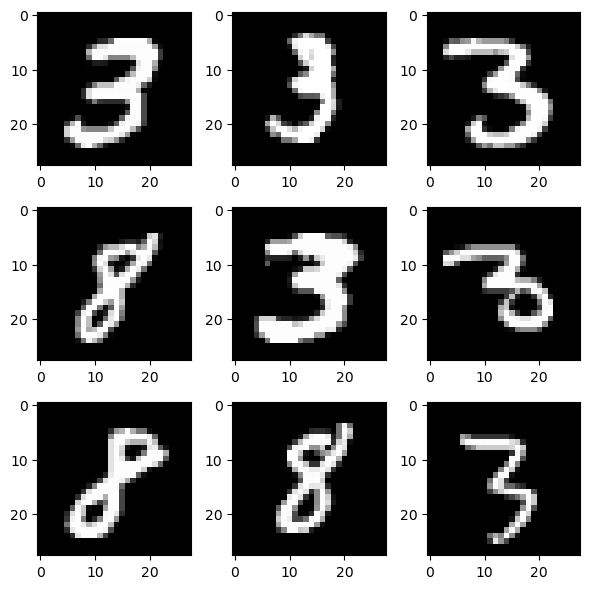

In [9]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

Target values are numbers.

In [10]:
y_train[:9]

array([3, 3, 3, 8, 3, 3, 8, 8, 3], dtype=uint8)

## Task 1 (1 point)
Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [11]:
def flatten_image(X):
    return X.reshape(28 ** 2) # your code here

In [12]:
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test]) # your code here
X_train_flat.shape, X_test_flat.shape

((11982, 784), (1984, 784))

PCA works best when the data is scaled (think, why?), so let's scale our data. We will use [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. Note, that scaling replaces a collection of vectors x by the collection of the vectors $x' = (x-M)/D$, where $M$ is the mean vector of
the sample, $D$ is the vector of standard deviations of all components of the vectors, and the division is component-wise. So, the scaled collection has the same size as the original one, and each column has 0 mean and unit standard deviation.


In [13]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

## Question 1

Please write your answer on the impact of scaling below. Why does scaling help PCA? If your idea need some computer experiments for confirmation (say, training and accuracy calculations  with non-scaled data), please provide the code here as well.

***Your answer here.***
We converted each feature (image pixels) from its original distribution to the standard normal distribution. This allows to compare all features on one scale, since they now have the same mean and standard deviation. Below are two images of the same digit 3 before and after scaling. It is clearly see that after scaling all features (pixels) are more "balanced" -- the image has lower contrast. This allows PCA to catch even "weaker" features which were shadowed by "stronger" features or outliers with larger mean and variance before scaling.

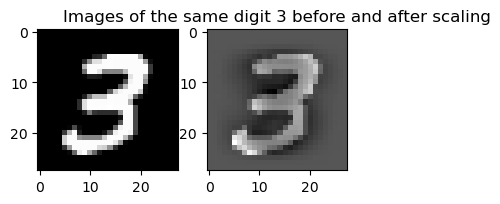

In [14]:
#your code here
plt.figure(figsize=(4,4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(X_train_flat[0].reshape((28, 28)), cmap='gray')
#plt.plot(X_train_flat[0])
plt.title('Images of the same digit 3 before and after scaling');

Now, we call PCA and reduce the number of components for each vector. 

In [15]:
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)

In [16]:
X_test_flat = pca.transform(X_test_flat)

In [17]:
X_train_flat.shape, X_test_flat.shape

((11982, 128), (1984, 128))

## Question 2

What is the ratio of the memory used for the data `compressed' by PCA and the one used for the original data?

***Your answer here.***
784 / 128 = 6.125

Now, we use SVM with linear kernel to separate the two classes.

In [18]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

Wall time: 2.53 s


c:\Users\andre\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [19]:
y_pred = clf.predict(X_test_flat) # your code here
acc = accuracy_score(y_test, y_pred) # your code here
print("Test accuracy: ", acc)

Test accuracy:  0.9667338709677419


## Try it from your own input
Try to make your own dataset. You can either make a photo image of an ink-written digit or draw a digit using a graphical editor of your computer or smartphone. Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset. It can be either in png or jpeg format. Replace the sample string with your file name. 

In [20]:
from scipy import misc
from PIL import Image

In [21]:
image = Image.open('my_3_standard.jpg').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

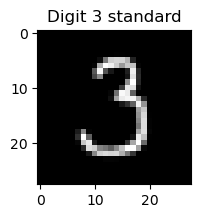

In [22]:
plt.figure(figsize=(2,2))
plt.imshow(custom, cmap='gray')
plt.title('Digit 3 standard')
plt.show()

Re-shape your image and make a prediction. 

In [23]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [24]:
# Recognized as digit 3
3 == clf.predict(custom)[0]

True

In [25]:
image = Image.open('my_3_flat.jpg').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

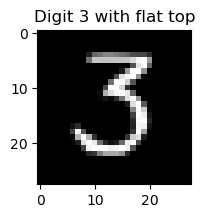

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(custom, cmap='gray')
plt.title('Digit 3 with flat top')
plt.show()

In [27]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [28]:
# Recognized as digit 3
3 == clf.predict(custom)[0]

True

In [29]:
image = Image.open('my_3_flipped.jpg').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

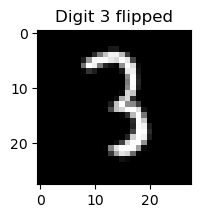

In [30]:
plt.figure(figsize=(2,2))
plt.imshow(custom, cmap='gray')
plt.title('Digit 3 flipped')
plt.show()

In [31]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [32]:
# Recognized as digit 3
3 == clf.predict(custom)[0]

True

In [33]:
image = Image.open('my_8_right.jpg').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

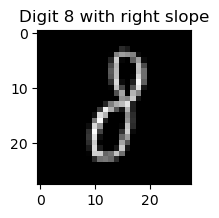

In [34]:
plt.figure(figsize=(2,2))
plt.imshow(custom, cmap='gray')
plt.title('Digit 8 with right slope')
plt.show()

In [35]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [36]:
# Recognized as digit 8
8 == clf.predict(custom)[0]

True

In [37]:
image = Image.open('my_8_left.jpg').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

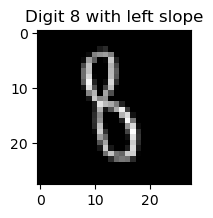

In [38]:
plt.figure(figsize=(2,2))
plt.imshow(custom, cmap='gray')
plt.title('Digit 8 with left slope')
plt.show()

In [39]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [40]:
# Recognized as digit 8
8 == clf.predict(custom)[0]

True

## Question 3

Repeat the above digit recognition procedure with other 5 to 10 hand-written images. Do your experiments confirm the above accuracy estimate? How do you think, why they confirm (or not confirm) it?

***Your answer here.*** The classifier looks to be working correctly, it can even recognize different shapes of digits, which is expected, since the classifier's accuracy is around 0.9667 on the test data.

## Task 2
Now let's try another approach explained [here](https://technodocbox.com/3D_Graphics/77509408-Handwritten-digit-classification-and-reconstruction-of-marred-images-using-singular-value-decomposition.html) in Section 3. For each digit, we create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit. Given an unrecognized flatten image, among average typical flattened images we find the closest one. Its target value is considered as a prediction for the target of the unrecognized image.

## SVD refesher
As you may recall from the lectures, SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.

In [41]:
def getSingularVectorsLeft(matrix, k=10): # let's take first 10 numbers
    # return first k columns of U from SVD of matrix
    U, S, VT = svd(matrix)
    return U[:,:k], S[:k]

In [42]:
def getSingularImage(X_train, y_train, number, k=10):
    # find images whose target is _number_
    A = X_train[np.where(y_train == number)]
    # Flatten each image, construct a matrix for all train digits and transpose to get stacked columns
    A = np.array([flatten_image(img) for img in A]).T
    #for image in select_images:
    # iteratively append new column to form matrix A
    
    left_basis, sigmas = getSingularVectorsLeft(A, k=k) # get left singular vectors

    return left_basis, sigmas

Try it first on "0".

In [43]:
left_basis, sigmas = getSingularImage(X_train_total, y_train_total, 0)
print(left_basis.shape)
assert left_basis.shape, (784, 10)

(784, 10)


### Task 2.1 (1 point)
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28. Use `numpy.reshape`.

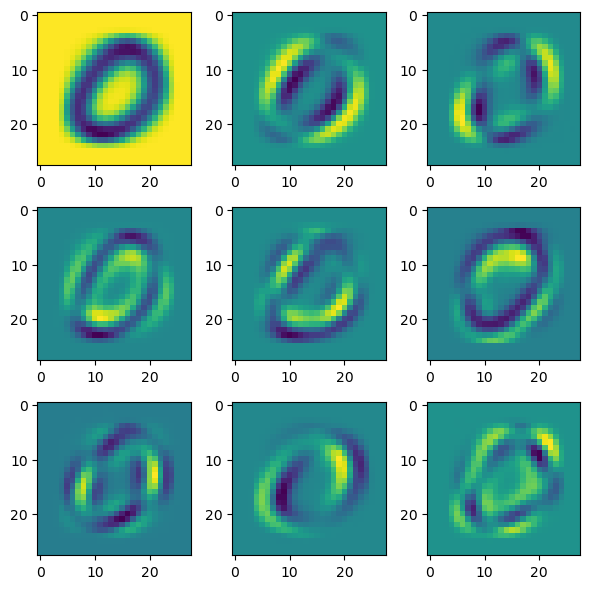

In [44]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    img = left_basis[:,i].reshape((28, 28)) # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='viridis')

plt.tight_layout()
plt.show()

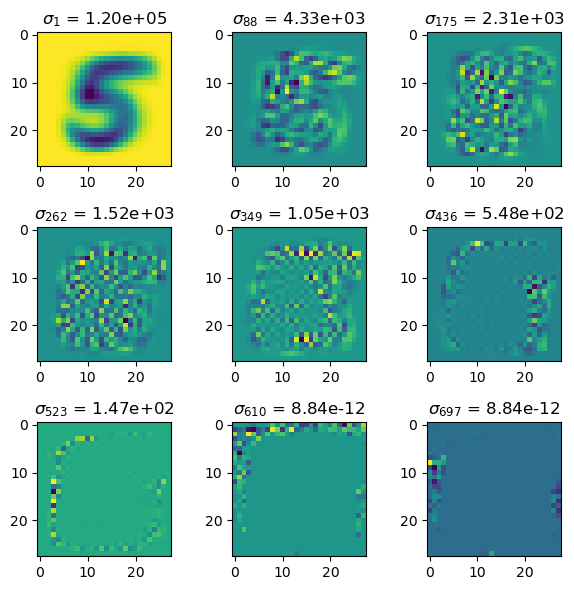

In [45]:
# Let's visually examine digit 5's nine singular images (subspaces) taken evenly,
# i.e. take every 784 // 9 = 87th column of U starting from the first column
left_basis, sigmas = getSingularImage(X_train_total, y_train_total, 5, 784)
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    sigma_idx = i * 784 // (a * b)
    img = left_basis[:,sigma_idx].reshape((28, 28)) # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='viridis')
    plt.title(f'$\sigma_{{{sigma_idx+1}}}$ = {sigmas[sigma_idx]:.2e}')

plt.tight_layout()
plt.show()

## Question 4

Reflect on properties of the columns of $U_k$. What properties do you think are contained in each of them? Draw more singular images to help you make conclusions.

***Your answer here.*** We can clearly see that the higher the value of $\sigma$, the better the singular image represents the original digit. Since, as per SVD, $\sigma_{1} \geq \sigma_{2} \geq \ldots \geq \sigma_{n} \geq 0$, the best singular image $u_{1}$ is for $\sigma_{1}$, i.e. the first image. In the middle of the U matrix the digit 5 may look like 6 or even 0, and towards the end of the U matrix no digit can be recognized at all. So, it is reasonable indeed to use only some number of first columns to characterize a digit.

Now let's move on and obtain singular images for all numbers. The matrices $U_k$ from  [the article](https://technodocbox.com/3D_Graphics/77509408-Handwritten-digit-classification-and-reconstruction-of-marred-images-using-singular-value-decomposition.html) are represented as `number_basis_matrices[k]`.
This might take a while to finish, feel free to add debug print in your function to know the progress.

In [46]:
# use getSingularImage function to get matrices for all numbers
# take 10 first columns of U
number_basis_matrices = np.array([getSingularImage(X_train_total, y_train_total, digit, k=10)[0] for digit in range(10)])
number_basis_matrices.shape

(10, 784, 10)

### Task 2.2 (1 point)
Plot the first singular image of each digit, similarly to the previous task.

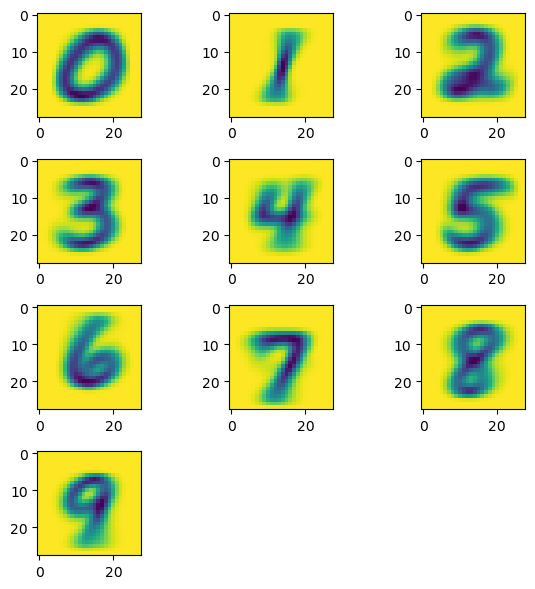

In [47]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    img = number_basis_matrices[i][:,0].reshape((28, 28)) # first column of U_k in number_basis_matrices[i] reshaped into 28x28 image
    plt.imshow(img, cmap='viridis')

plt.tight_layout()
plt.show()

In [48]:
dim = number_basis_matrices[0].shape[0]
dim

784

### Task 2.3 (1.5 points)

Here we calculate the new projection matrix for each $U_{k}$ to apply later in testing:
$pr = (I - U_{k} \cdot U_{k}^{T})$. Use `numpy.matmul` for matrix multiplication and `numpy.identity` to create an identity matrix. Please note that this operation might also take some time to finish.

In [49]:
# create an array of pr for each number
numeric_values = []
iden_mat = np.identity(784)
for i in range(10):
    pr = iden_mat - number_basis_matrices[i] @ number_basis_matrices[i].T
    numeric_values.append(pr)
numeric_values = np.array(numeric_values)
numeric_values.shape

(10, 784, 784)

### Task 2.4 (1.5 points)
Implement function utilizing `numeric_values` matrices to predict labels for unknown images. Use `numpy.norm` and enumerate to iterate over numeric values.

Find the minimal residual between the unknown digit $z$ and a linear combination of singular images: $||(I - U_{k} U_{k}^T) z || \rightarrow min$. The index of the minimal residual among all 10 digits is the predicted digit (target).

In [50]:
def find_closest(test_value, numeric_values):
    stacked_test = test_value.reshape(-1, 1)
    # find closest U_k to test_value using norm and return the target digit
    residuals = []
    for i in range(10):
        residuals.append(np.linalg.norm(numeric_values[i] @ stacked_test))
    residuals = np.array(residuals)
    target = np.argmin(residuals)
    return target

In [51]:
# find array of predictions for test values and calculate accuracy in the cell below
y_pred = np.array([find_closest(img, numeric_values) for img in X_test_total])

In [52]:
acc = accuracy_score(y_test_total, y_pred)
acc

0.9485

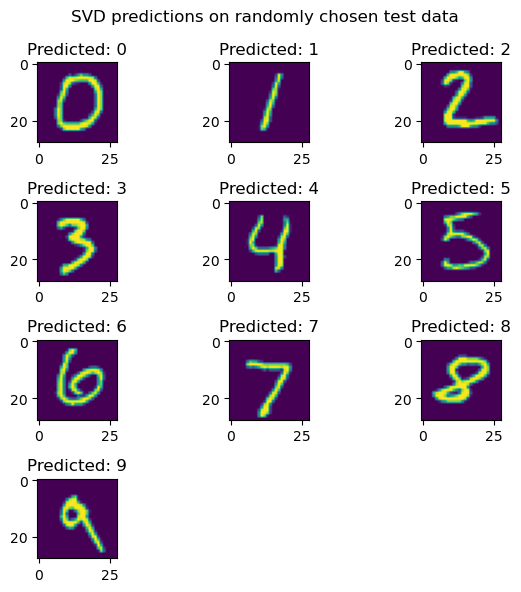

In [62]:
# SVD predictions of each digit on randomly chosen test data
#img_idx = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4] # indices of some digits 0 - 9 from X_train_total
img_idx = [10, 2, 1, 30, 4, 15, 11, 0, 61, 7] # indices of some digits 0 - 9 from X_test_total
plt.figure(figsize=(6,6))
plt.suptitle('SVD predictions on randomly chosen test data')
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    #img = X_train_total[img_idx[i]]
    img = X_test_total[img_idx[i]]
    plt.imshow(img, cmap='viridis')
    y_pred = find_closest(img, numeric_values)
    plt.title(f'Predicted: {y_pred}')
plt.tight_layout()
plt.show()

In [54]:
# Let's also plot prediction accuracy vs number of singular images (columns in U_k)
ks = range(1, 51) # make predictions for this range of columns
accs = []
iden_mat = np.identity(784)
for k in ks:
    number_basis_matrices = np.array([getSingularImage(X_train_total, y_train_total, digit, k=k)[0] for digit in range(10)])
    numeric_values = []
    for i in range(10):
        pr = iden_mat - number_basis_matrices[i] @ number_basis_matrices[i].T
        numeric_values.append(pr)
    numeric_values = np.array(numeric_values)
    y_pred = np.array([find_closest(img, numeric_values) for img in X_test_total])
    accs.append(accuracy_score(y_test_total, y_pred))

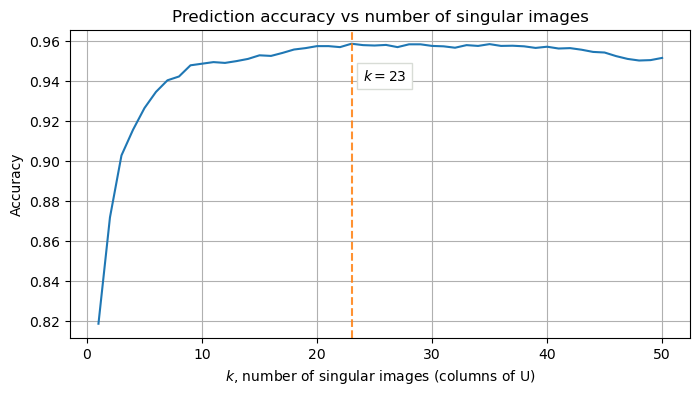

In [55]:
k_max = np.argmax(accs)+1
plt.figure(figsize=(8, 4))
plt.plot(ks, accs, color='C0')
plt.axvline(k_max, color='C1', linestyle='--', alpha=0.85)
plt.text(24, 0.94, f'$k = {k_max}$', fontsize=10, bbox=dict(facecolor='xkcd:white', edgecolor='xkcd:light grey'))
#plt.xticks(ks)
plt.title('Prediction accuracy vs number of singular images')
plt.xlabel('$k$, number of singular images (columns of U)')
plt.ylabel('Accuracy')
plt.grid();

The prediction accuracy quickly gains as the number of singular images increases but then saturates at around 20 images, getting to max at $k = 23$. So, it looks reasonable indeed to use first 10 - 20 columns of the matrix U instead of all 784 columns.

## Additional task (2 points)
In the first task we trained Linear SVM to separate 3s and 8s. Here you can implement multiclass classification for _all_ numbers in `MNIST`. Use the same function LinearSVC for “one-vs-the-rest” multi-class strategy, see [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).  Follow the same steps from task 1: scaling, feature selection, training and testing. Is the accuracy of this method greater than the one calculated above?

**Note:** Use `random_state=42` for `PCA` and `LinearSVC`. Training `LinearSVC` on all the data might take a while, that's normal.

In [56]:
# flatten
X_train_total_flat = np.array([flatten_image(img) for img in X_train_total])
X_test_total_flat = np.array([flatten_image(img) for img in X_test_total])
X_train_total_flat.shape, X_test_total_flat.shape

((60000, 784), (10000, 784))

In [57]:
# Scandart Scaler
X_train_total_flat = scaler.fit_transform(X_train_total_flat)
X_test_total_flat = scaler.transform(X_test_total_flat)

In [58]:
# PCA
pca = PCA(n_components=128, random_state=42)
X_train_total_flat = pca.fit_transform(X_train_total_flat)
X_test_total_flat = pca.transform(X_test_total_flat)
X_train_total_flat.shape, X_test_total_flat.shape

((60000, 128), (10000, 128))

In [59]:
# LinearSVC
clf = LinearSVC(random_state=42)
clf.fit(X_train_total_flat, y_train_total)

c:\Users\andre\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [60]:
y_pred = clf.predict(X_test_total_flat)
acc = accuracy_score(y_test_total, y_pred)
print("Test accuracy: ", acc)

Test accuracy:  0.9079


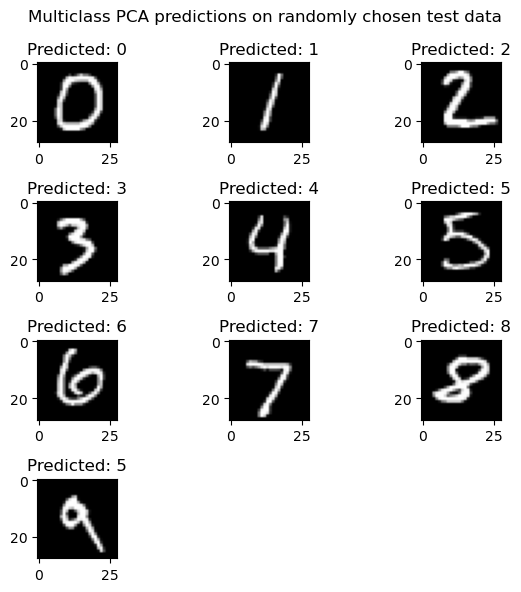

In [61]:
# PCA predictions of each digit on randomly chosen test data
img_idx = [10, 2, 1, 30, 4, 15, 11, 0, 61, 7] # indices of some digits 0 - 9 from X_test_total
plt.figure(figsize=(6,6))
plt.suptitle('Multiclass PCA predictions on randomly chosen test data')
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    custom = X_test_total[img_idx[i]]
    plt.imshow(custom, cmap='gray')
    custom = flatten_image(custom).reshape(1, -1)
    custom = scaler.transform(custom)
    custom = pca.transform(custom)
    y_pred = clf.predict(custom)[0]
    plt.title(f'Predicted: {y_pred}')
plt.tight_layout()
plt.show()

We can see that the accuracy of multiclass predictions 0.9079 is less than the accuracy for the binary classification 0.9667. This is expected, since it seems to be easier to distinguish between two digits than between ten digits. Also SVD accuracy 0.9485 is higher than PCA accuracy 0.9079.